In [1]:
#package importing
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statistics 

### First Dataset -- Loan Consumer Complaints

In [2]:
dataFirst = open('consumer_complaints1.csv','r')
df_first = pd.read_csv(dataFirst)

In [3]:
print(f"This dataframe has {df_first.shape[0]} rows and {df_first.shape[1]} columns.")

This dataframe has 555957 rows and 18 columns.


In [4]:
df_first.head(2)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080


In [5]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [6]:
print(f'Number of duplicate fields {len(df_first[df_first.duplicated()])}')
print(f'Null items: \n {df_first.isna().sum()}')

Number of duplicate fields 0
Null items: 
 date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64


In [7]:
missNan_cols = ['sub_issue', 'consumer_complaint_narrative',
            'company_public_response', 'tags', 'consumer_consent_provided']
df_first = df_first.drop(missNan_cols, axis =1)

### Mean & Std

In [8]:
df_first.issue.unique()

array(['Loan modification,collection,foreclosure',
       'Loan servicing, payments, escrow account',
       'Incorrect information on credit report', 'Repaying your loan',
       'False statements or representation',
       'Application processing delay', 'Credit line increase/decrease',
       'Deposits and withdrawals',
       "Cont'd attempts collect debt not owed",
       'Credit decision / Underwriting',
       'Application, originator, mortgage broker',
       'Communication tactics', 'Late fee',
       'Improper contact or sharing of info', 'Billing disputes',
       'Making/receiving payments, sending money', 'Rewards',
       'Managing the loan or lease', 'Settlement process and costs',
       'Taking/threatening an illegal action',
       'Disclosure verification of debt',
       'Identity theft / Fraud / Embezzlement',
       'Customer service / Customer relations',
       'Forbearance / Workout plans', 'Closing/Cancelling account',
       'Improper use of my credit report'

In [9]:
#factorizing the issues in to uniques values starting at 0
df_first['issue'] = pd.factorize(df_first.issue)[0] + 1

In [10]:
print(f"The mean value of the issue is {df_first['issue'].mean()} ")
print(f"The standard deviation of the issue is {statistics.stdev(df_first.issue)} ")

The mean value of the issue is 15.782461593252716 
The standard deviation of the issue is 18.24878685589292 


### Outlier

In [91]:
#factorizing the textual values in to uniques values starting at 0
df_first['sub_product'] = pd.factorize(df_first.sub_product)[0] + 1
df_first['state'] = pd.factorize(df_first.state)[0] + 1
df_first['submitted_via'] = pd.factorize(df_first.submitted_via)[0] + 1
df_first['timely_response'] = pd.factorize(df_first.timely_response)[0] + 1
df_first['company_response_to_consumer'] = pd.factorize(df_first.company_response_to_consumer)[0] + 1
df_first['consumer_disputed?'] = pd.factorize(df_first['consumer_disputed?'])[0] + 1

In [92]:
#removing unrequired columns that indentify consumers
cols = list(df_first.columns)
cols.remove('product')
cols.remove('company')
cols.remove('date_received')
cols.remove('date_sent_to_company')
df_first[cols]

,sub_product,issue,state,zipcode,submitted_via,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,1,1,1,95993,1,1,1,1,511074
1,1,2,1,91104,1,1,1,1,511080
2,0,3,2,11764,2,1,1,2,510473
3,2,4,3,21402,3,1,1,1,510326
4,3,5,4,30106,4,1,1,1,511067
...,...,...,...,...,...,...,...,...,...
555952,1,1,0,NaN,1,1,1,2,919529
555953,1,2,0,NaN,1,1,2,2,918447
555954,8,1,0,NaN,5,1,1,2,114550
555955,12,12,0,NaN,5,5,2,2,1329963


In [93]:
#finding the zScore for every value in the columns
df_firstZscore = (df_first[cols] - df_first[cols].mean())/df_first[cols].std()
df_firstZscore

,company_response_to_consumer,complaint_id,consumer_disputed?,issue,state,sub_product,submitted_via,timely_response,zipcode
0,-0.480821,-0.815685,-1.989463,-0.810052,-1.081534,-0.673172,-1.782794,-0.161007,NaN
1,-0.480821,-0.815674,-1.989463,-0.755254,-1.081534,-0.673172,-1.782794,-0.161007,NaN
2,-0.480821,-0.816777,0.502647,-0.700455,-1.002581,-0.824304,-1.033137,-0.161007,NaN
3,-0.480821,-0.817044,-1.989463,-0.645657,-0.923628,-0.522041,-0.283481,-0.161007,NaN
4,-0.480821,-0.815697,-1.989463,-0.590859,-0.844675,-0.370909,0.466175,-0.161007,NaN
...,...,...,...,...,...,...,...,...,...
555952,-0.480821,-0.073619,0.502647,-0.810052,-1.160487,-0.673172,-1.782794,-0.161007,NaN
555953,-0.480821,-0.075585,0.502647,-0.755254,-1.160487,-0.673172,-1.782794,6.210914,NaN
555954,-0.480821,-1.536075,0.502647,-0.810052,-1.160487,0.384749,1.215832,-0.161007,NaN
555955,2.236540,0.672042,0.502647,-0.207272,-1.160487,0.989275,1.215832,6.210914,NaN


In [94]:
#number of annomalies in every column
df_firstZscore[df_firstZscore>3].count()

company_response_to_consumer    23214
complaint_id                        0
consumer_disputed?                  0
issue                           16687
state                            1685
sub_product                     15100
submitted_via                       0
timely_response                 14048
zipcode                             0
dtype: int64

### EDA

In [143]:
df_first['year'] = df_first['date_received'].map(lambda x: x.split("-")[-1] if "-" in x else x.split("/")[-1])
df_first['month'] = df_first['date_received'].map(lambda x: x.split("-")[0] if "-" in x else x.split("/")[0])

In [144]:
df_first.year.unique()

array(['2013', '2014', '2015', '2016', '2012', '2011'], dtype=object)

<AxesSubplot:xlabel='year', ylabel='count'>

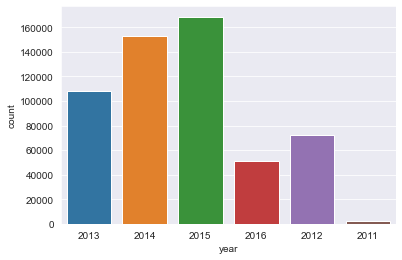

In [145]:
sns.countplot(x='year', data = df_first[df_first["year"]!='2018'])

<AxesSubplot:xlabel='month', ylabel='count'>

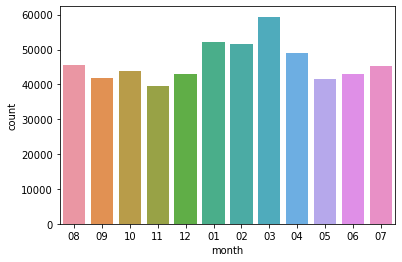

In [57]:
sns.countplot(x="month", data=df_first)

<AxesSubplot:xlabel='product', ylabel='count'>

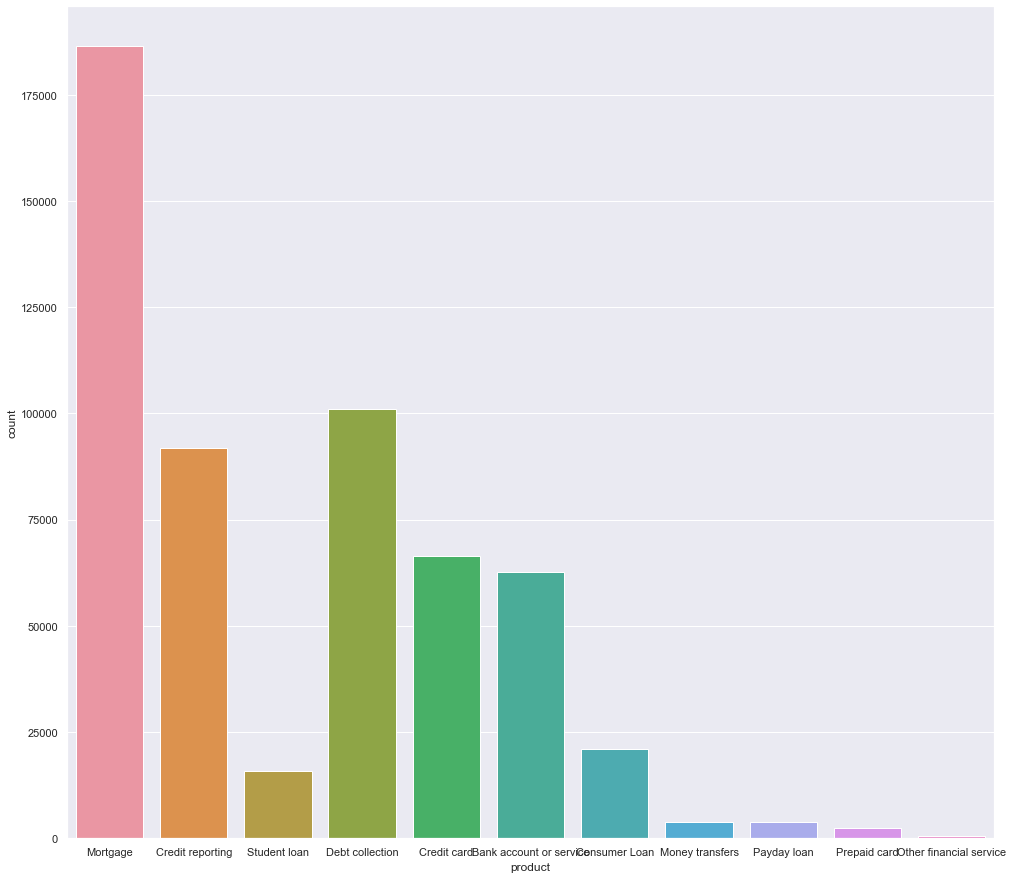

In [70]:
sns.set(rc={'figure.figsize':(16.6,15.30)})
sns.countplot(x="product", data=df_first)

<AxesSubplot:>

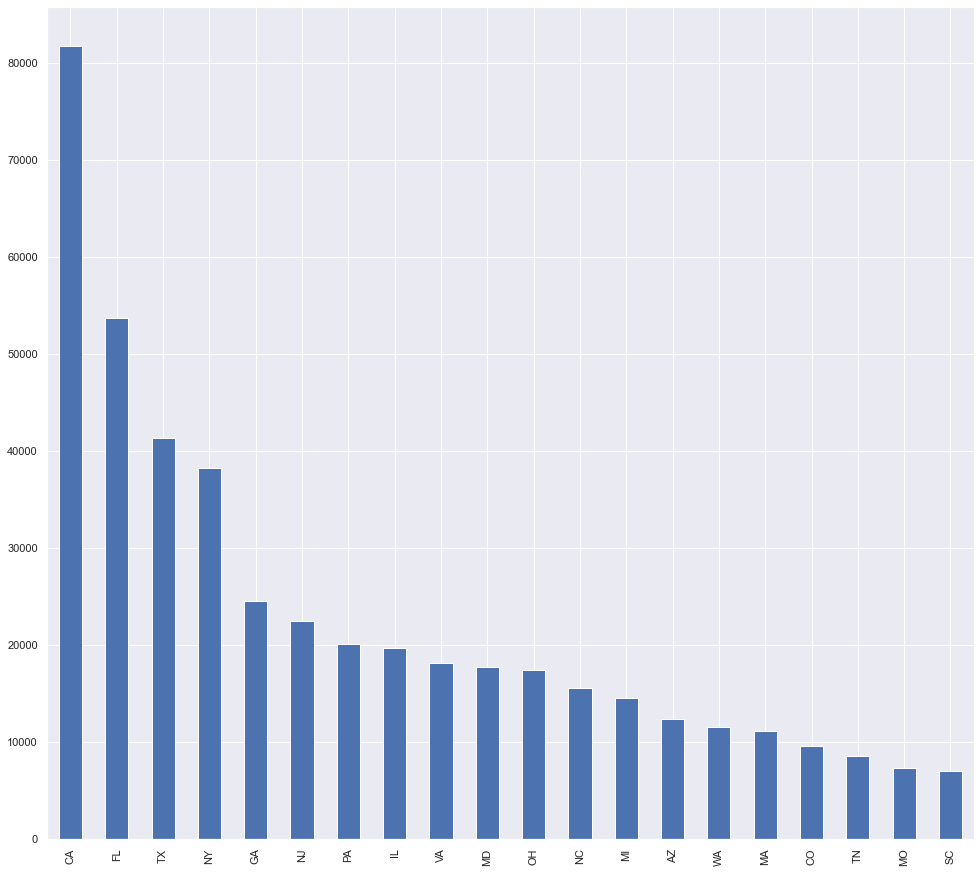

In [86]:
df_first['state'].value_counts()[:20].plot(kind='bar')

<AxesSubplot:>

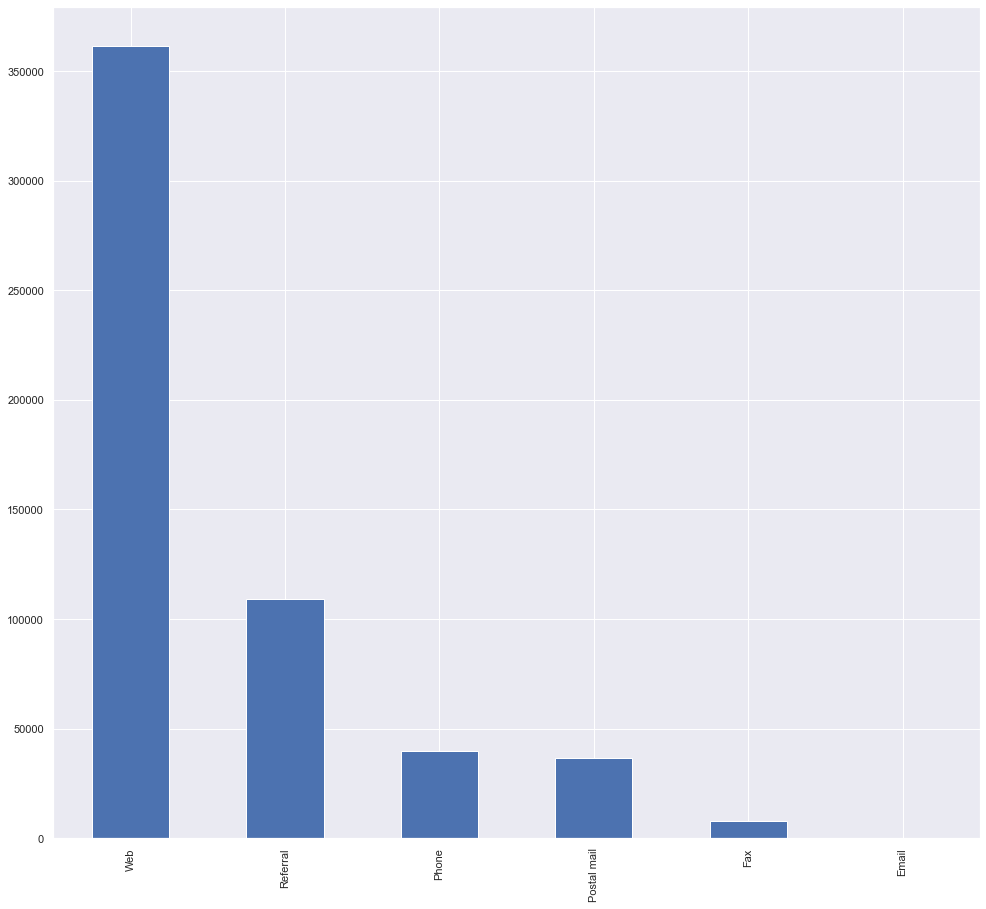

In [88]:
df_first['submitted_via'].value_counts().plot(kind='bar')

Populating the interactive namespace from numpy and matplotlib


<AxesSubplot:title={'center':'Complaints Per year'}, xlabel='product'>

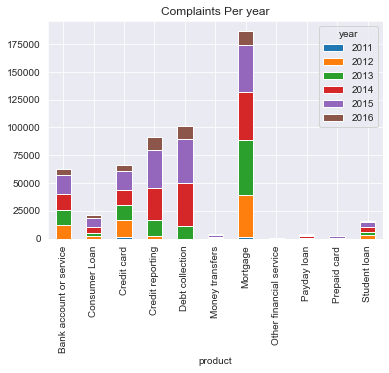

In [149]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

df1 = df_first.groupby(['year', 'product'])['year'].count().unstack('year').fillna(0)
df1.plot(title = 'Complaints Per year', kind='bar', stacked=True)


<AxesSubplot:title={'center':'Complaints Submission via'}, xlabel='product'>

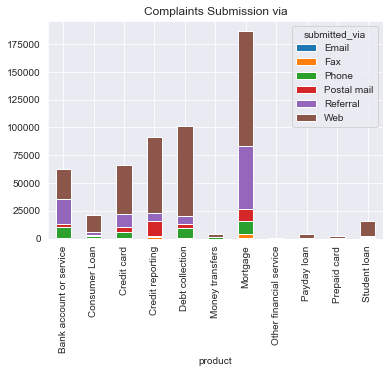

In [160]:

df2 = df_first.groupby(['submitted_via', 'product'])['submitted_via'].count().unstack('submitted_via').fillna(0)
df2.plot(title = 'Complaints Submission via', kind='bar', stacked=True)


## Second Dataset -- Melbourne Housing prices

In [3]:
dataSecond = open('Melbourne_housing_FULL.csv', 'r')
df_second = pd.read_csv(dataSecond)

In [4]:
df_second.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [5]:
print(f"This dataframe has {df_second.shape[0]} rows and {df_second.shape[1]} columns.")

This dataframe has 34857 rows and 21 columns.


In [6]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [7]:
df_second.isna().sum()
df_second=df_second.dropna()

In [66]:
print(f'Number of duplicate fields {len(df_second[df_second.duplicated()])}')
print(f'Null items: \n {df_second.isna().sum()}')

Number of duplicate fields 0
Null items: 
 Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


### Mean & Std

In [63]:
df_second.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria',
       'Eastern Victoria', 'Western Victoria'], dtype=object)

In [67]:
#creating unique numeric value for region name
df_second['Regionname'] = pd.factorize(df_second.Regionname)[0] + 1

In [69]:
print(f"Region Mean Value {df_second['Regionname'].mean()}")
print(f"The Region standard deviation is {statistics.stdev(df_second.Regionname)}")

Mean Value of the region 2.442556543265444
The Region standard deviation is 1.2844586492107917


### Outlier detection

In [70]:
df_second.Suburb.unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Maidstone', 'Malvern', 

In [72]:
#unique numeric values for every column
df_second['Suburb'] = pd.factorize(df_second.Suburb)[0] + 1
df_second['Method'] = pd.factorize(df_second.Method)[0] + 1
df_second['Regionname'] = pd.factorize(df_second.Regionname)[0] + 1
df_second['Type'] = pd.factorize(df_second.Type)[0] + 1

In [75]:
#removing unrequired columns that indentify consumers
cols = list(df_second.columns)
cols.remove('Address')
cols.remove('SellerG')
cols.remove('BuildingArea')
cols.remove('Date')
#cols.remove('BuildingArea')
cols.remove('CouncilArea')
df_second[cols]

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
2,1,2,1,1035000.0,1,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,-37.80790,144.99340,1,4019.0
4,1,3,1,1465000.0,2,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,-37.80930,144.99440,1,4019.0
6,1,4,1,1600000.0,3,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,-37.80720,144.99410,1,4019.0
11,1,3,1,1876000.0,1,2.5,3067.0,4.0,2.0,0.0,245.0,1910.0,-37.80240,144.99930,1,4019.0
14,1,2,1,1636000.0,1,2.5,3067.0,2.0,1.0,2.0,256.0,1890.0,-37.80600,144.99540,1,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,258,3,1,500000.0,4,25.5,3750.0,3.0,2.0,2.0,383.0,2016.0,-37.61940,145.03951,1,2940.0
34849,258,3,1,570000.0,2,25.5,3750.0,3.0,2.0,2.0,404.0,2012.0,-37.61031,145.03393,1,2940.0
34853,108,2,1,888000.0,2,6.3,3013.0,2.0,2.0,1.0,98.0,2018.0,-37.81551,144.88826,2,6543.0
34854,108,2,3,705000.0,1,6.3,3013.0,2.0,1.0,2.0,220.0,2000.0,-37.82286,144.87856,2,6543.0


In [76]:
#Calculating zScore for every value in every column
df_secondZScore = (df_second[cols] - df_second[cols].mean())/df_second[cols].std()
df_secondZScore

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
2,-1.359236,-1.140200,-0.540754,-0.085227,-0.665193,-1.276879,-0.396599,-1.115842,-0.895842,-1.734812,-0.346247,-1.775156,-0.037538,0.016873,-1.123085,-0.790153
4,-1.359236,-0.102625,-0.540754,0.547701,0.245962,-1.276879,-0.396599,-0.080934,0.489945,-1.734812,-0.366976,-1.775156,-0.053000,0.025282,-1.123085,-0.790153
6,-1.359236,0.934950,-0.540754,0.746411,1.157117,-1.276879,-0.396599,-0.080934,-0.895842,0.315494,-0.380167,1.302525,-0.029808,0.022759,-1.123085,-0.790153
11,-1.359236,-0.102625,-0.540754,1.152663,-0.665193,-1.276879,-0.396599,0.953974,0.489945,-1.734812,-0.262390,-1.505184,0.023203,0.066486,-1.123085,-0.790153
14,-1.359236,-1.140200,-0.540754,0.799401,-0.665193,-1.276879,-0.396599,-1.115842,-0.895842,0.315494,-0.252025,-2.045128,-0.016555,0.033691,-1.123085,-0.790153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,2.407273,-0.102625,-0.540754,-0.872707,2.068271,2.098821,5.668352,-0.080934,0.489945,0.315494,-0.132363,1.356519,2.044219,0.404614,-1.123085,-1.036781
34849,2.407273,-0.102625,-0.540754,-0.769673,0.245962,2.098821,5.668352,-0.080934,0.489945,0.315494,-0.112577,1.248530,2.144607,0.357692,-1.123085,-1.036781
34853,0.208921,-1.140200,-0.540754,-0.301600,0.245962,-0.719154,-0.876111,-1.115842,0.489945,-0.709659,-0.400896,1.410513,-0.121582,-0.867255,-0.344547,-0.213242
34854,0.208921,-1.140200,2.680210,-0.570963,-0.665193,-0.719154,-0.876111,-1.115842,-0.895842,0.315494,-0.285945,0.924564,-0.202754,-0.948823,-0.344547,-0.213242


In [78]:
#count of annomilies per column
df_secondZScore[df_secondZScore>3].count()

Suburb            27
Rooms             64
Type               0
Price            157
Method             0
Distance         224
Postcode         153
Bedroom2          62
Bathroom         129
Car              113
Landsize          63
YearBuilt          0
Lattitude         15
Longtitude        20
Regionname        94
Propertycount    194
dtype: int64

### EDA

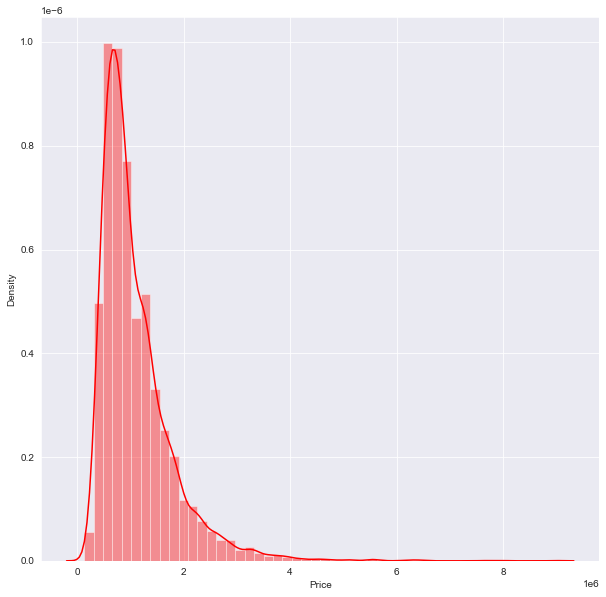

In [10]:
sns.set_style('darkgrid')

plt.subplots(figsize=(10,10))
sns.distplot(df_second.Price, kde=True, color='r')
plt.show()

Text(0.5, 1.0, 'Propertycount v Price')

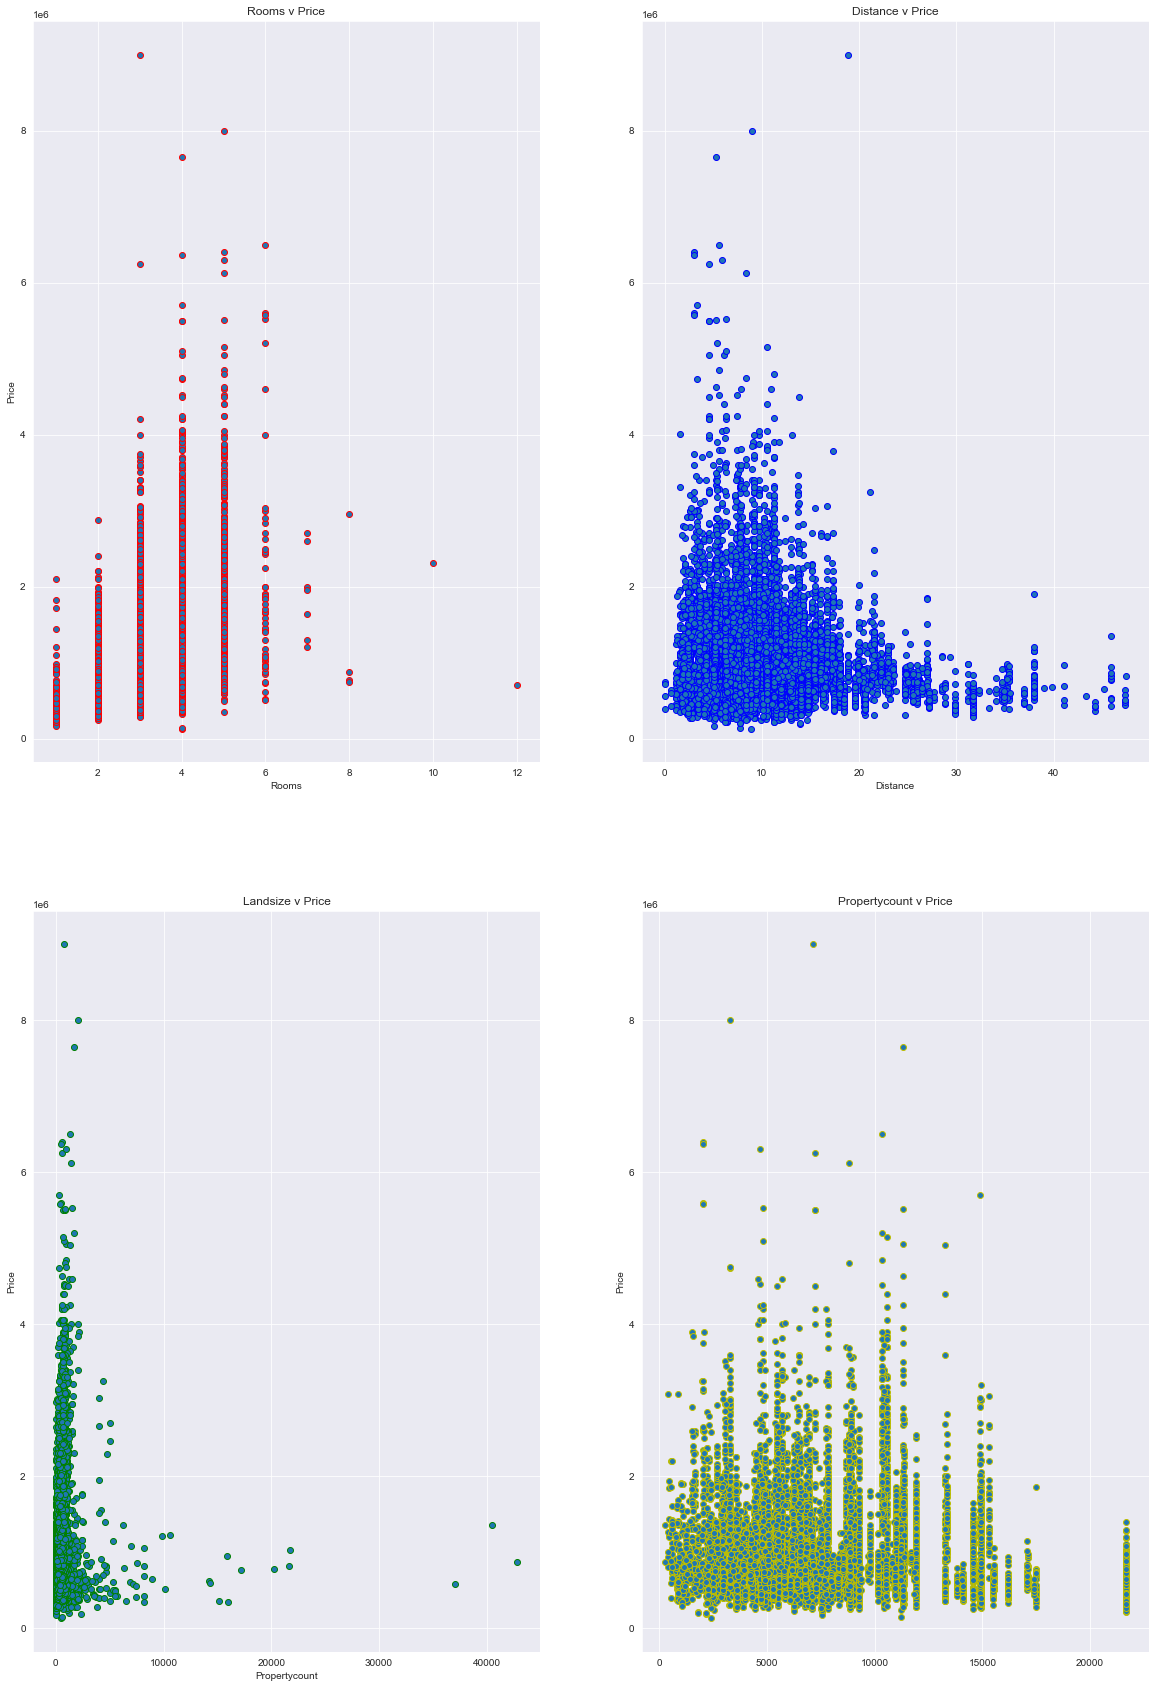

In [61]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (20,30))

axes[0,0].scatter(x = 'Rooms', y = 'Price', data = df_second, edgecolor = 'r')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')


axes[0,1].scatter(x = 'Distance', y = 'Price', data = df_second, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')


axes[1,0].scatter(x = 'Landsize', y = 'Price', data = df_second, edgecolor = 'g')
axes[1,0].set_xlabel('Landsize')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Landsize v Price')


axes[1,1].scatter(x = 'Propertycount', y = 'Price', data = df_second, edgecolor = 'y')
axes[1,0].set_xlabel('Propertycount')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Propertycount v Price')



Text(0.5, 1.0, 'Variable Correlation')

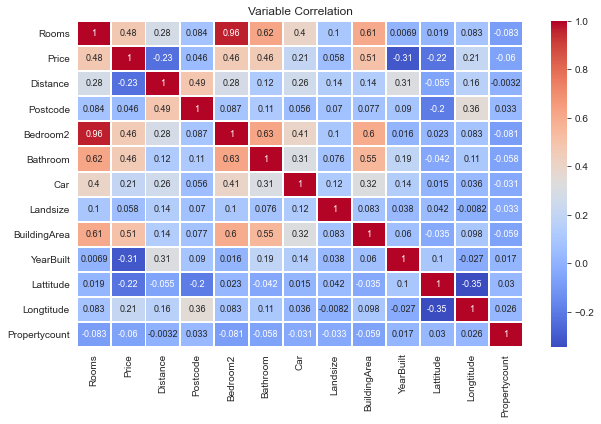

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(df_second.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variaable Correlation')

## Third Dataset-- Fraud Dataset

In [42]:
#importing dataset three
dataThird = open('SFD.csv', 'r')
df_third = pd.read_csv(dataThird)

In [43]:
df_third.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [44]:
print(f"This dataframe has {df_third.shape[0]} rows and {df_third.shape[1]} columns.")

This dataframe has 6362620 rows and 11 columns.


### Mean & Std

In [45]:
#Unique values in dataset
df_third.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [46]:
#replacing the unique values in the type of transactions into numeric values
df_third['type'].replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT','DEBIT', 'CASH_IN'],
           value= [0,1,2,3,4],
           inplace=True)

In [47]:
print(f"The type of payment has {df_third['type'].mean()} mean value")
print(f"The type of payment has {statistics.stdev(df_third.type)} standard deviation")

The type of payment has 1.6863086275779475 mean value
The type of payment has 1.4913553667637103 standard deviation


### Outlier Detection

In [48]:
#removing unrequired columns that indentify consumers
cols = list(df_third.columns)
cols.remove('nameOrig')
cols.remove('nameDest')
df_third[cols]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,0,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,1,181.00,181.00,0.00,0.00,0.00,1,0
3,1,2,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,0,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,1,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,2,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,1,850002.52,850002.52,0.00,0.00,0.00,1,0


In [49]:
#calcualting zscore for every value in every column
df_ThirdZscore = (df_third[cols] - df_third[cols].mean())/df_third[cols].std()
df_ThirdZscore

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,-1.703041,-1.130722,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,-0.035951,-0.001586
1,-1.703041,-1.130722,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,-0.035951,-0.001586
2,-1.703041,-0.460191,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,27.815481,-0.001586
3,-1.703041,0.210340,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,27.815481,-0.001586
4,-1.703041,-1.130722,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,-0.035951,-0.001586
...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.210340,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,27.815481,-0.001586
6362616,3.510123,-0.460191,10.153952,1.896491,-0.292442,-0.323814,-0.333411,27.815481,-0.001586
6362617,3.510123,0.210340,10.153952,1.896491,-0.292442,-0.303665,1.403027,27.815481,-0.001586
6362618,3.510123,-0.460191,1.109765,0.005581,-0.292442,-0.323814,-0.333411,27.815481,-0.001586


In [51]:
#sum of annomalies in every column
df_ThirdZscore[df_ThirdZscore>3].count()

step               66620
type                   0
amount             44945
oldbalanceOrg     155140
newbalanceOrig    155931
oldbalanceDest     79845
newbalanceDest     75166
isFraud             8213
isFlaggedFraud        16
dtype: int64

### EDA

<AxesSubplot:xlabel='type', ylabel='count'>

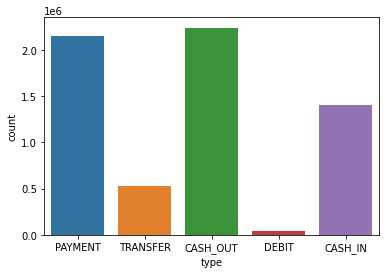

In [23]:
#General input of 
sns.countplot(x='type',data=df_third)

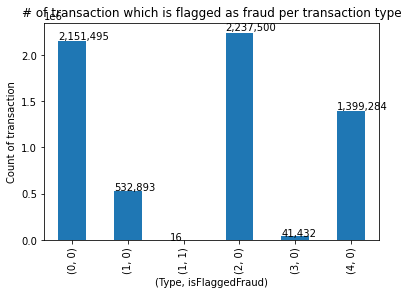

In [10]:
ax = df_third.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

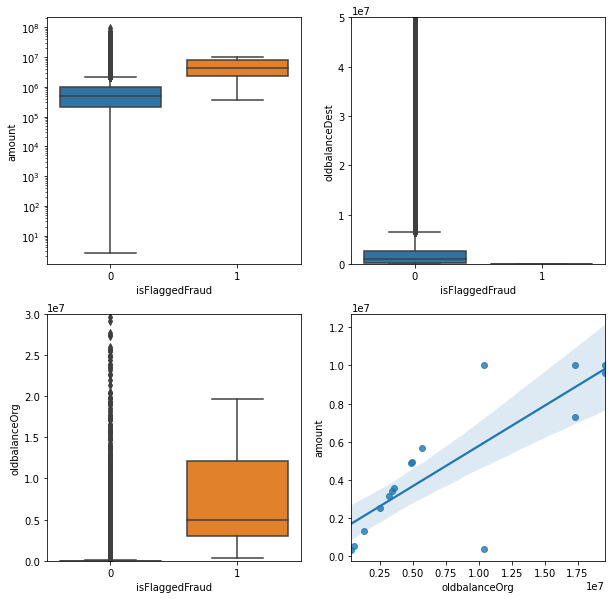

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df_third.loc[(df_third.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()
